# 在单位球面上均匀采样

https://mathworld.wolfram.com/SpherePointPicking.html

Another easy way to pick a random point on a sphere is to generate three Gaussian random variables $x, y$, and $z$. Then the distribution of the vectors

$$
\frac{1}{\sqrt{x^2+y^2+z^2}}\left[\begin{array}{c}
x \\
y \\
z
\end{array}\right]
$$

is uniform over the surface $\mathbb{S}^2$ (Muller 1959, Marsaglia 1972).

首先对每个维度生成独立的标准正态分布 $(\mathcal{N}(0,1))$ 随机向量，然后把它除以自身的欧式范数，从而把它 ＂投影＂到单位球面上。

之所以能够做到均匀采样，关键在于多元正态分布的旋转不变性（isotropy）：
- 独立同分布的 $N(0,1)$ 分量构成的向量，其分布在任意正交变换（旋转）下保持不变。
- 所以，无论怎样对初始高斯向量＂朝哪个方向＂拉长或旋转，归一化后它落在球面上的分布都是均匀的。

这种方法，也称为＂高斯归一化法＂，是在高维空间中最常用且高效的球面均匀采样方法之一。

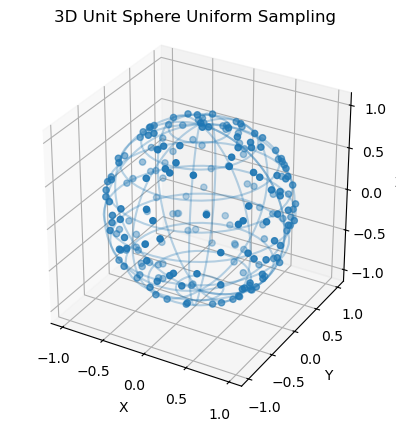

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 采样点数
num_samples = 200

# 在3维空间生成高斯随机向量并归一化到单位球面
points = np.random.randn(num_samples, 3)

#################################
# 尝试修改分布，比如期望不是0，或者方差不是1
# points =  10 + 2 * np.random.randn(num_samples, 3)

points /= np.linalg.norm(points, axis=1)[:, None]

# 球面参数化
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))

# 绘制3D散点图和单位球面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=20)

# 绘制球面线框
ax.plot_wireframe(x, y, z, rstride=5, cstride=5, alpha=0.3)

# 设置图形外观
ax.set_title('3D Unit Sphere Uniform Sampling')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])

plt.show()


# 如何计算在单位球面上定义的函数f在整个球面上的期望值。并给出具体的算例。

在单位球面 $S^{n-1}=\{x\in\mathbb R^n:\|x\|=1\}$ 上，若我们取**均匀分布**（即以球面面积测度 $\sigma_{n-1}$ 作参考），函数 $f:S^{n-1}\operatorname{Tr}o\mathbb R$ 的期望定义为
$$
    \mathbb E[f]
    =\int_{S^{n-1}} f(x)\,P(\mathrm{d}x)
    =\frac{1}{\sigma_{n-1}(S^{n-1})}
    \int_{S^{n-1}} f(x)\,\mathrm{d}\sigma_{n-1}(x).
$$


一、计算步骤（以 $n=3$ 为例，即单位球面 $S^2$）

1. **球面面积**
$$
    \sigma_2(S^2)=4\pi.
$$
2. **选取球坐标**
$$
    x=(\sin\operatorname{Tr}heta\cos\phi,\;\sin\operatorname{Tr}heta\sin\phi,\;\cos\operatorname{Tr}heta),\quad
    \operatorname{Tr}heta\in[0,\pi],\;\phi\in[0,2\pi),
$$
面元为 $\mathrm{d}\sigma_2=\sin\operatorname{Tr}heta\,\mathrm{d}\operatorname{Tr}heta\,\mathrm{d}\phi$。

3. **写出期望公式**
$$
    \mathbb E[f]
    =\frac{1}{4\pi}
    \int_0^{2\pi}\!\!\int_0^\pi
    f\bigl(\operatorname{Tr}heta,\phi\bigr)\,\sin\operatorname{Tr}heta\,\mathrm{d}\operatorname{Tr}heta\,\mathrm{d}\phi.
$$


二、具体算例：令
$$
    f(x)=x_3^2=\cos^2\operatorname{Tr}heta.
$$
则
$$
\begin{aligned}
\mathbb{E}\left[x_3^2\right] & =\frac{1}{4 \pi} \int_{\phi=0}^{2 \pi} \int_{\operatorname{Tr}heta=0}^\pi \cos ^2 \operatorname{Tr}heta \sin \operatorname{Tr}heta \mathrm{~d} \operatorname{Tr}heta \mathrm{~d} \phi \\
& =\frac{1}{4 \pi} \cdot 2 \pi \int_0^\pi \cos ^2 \operatorname{Tr}heta \sin \operatorname{Tr}heta \mathrm{~d} \operatorname{Tr}heta=\frac{1}{2} \int_{u=\cos \operatorname{Tr}heta=1}^{-1} u^2(-\mathrm{d} u)=\frac{1}{2} \int_{-1}^1 u^2 \mathrm{~d} u \\
& =\frac{1}{2} \cdot \frac{2}{3}=\frac{1}{3} .
\end{aligned}
$$
这里我们令 $u=\cos\operatorname{Tr}heta$，$\sin\operatorname{Tr}heta\,\mathrm{d}\operatorname{Tr}heta=-\mathrm{d}u$，最后得到 $\mathbb E[x_3^2]=1/3$。

In [34]:
import numpy as np

# Sample N points uniformly on the unit sphere S^2
def sample_sphere(n):
    points = np.random.normal(size=(n, 3))
    points /= np.linalg.norm(points, axis=1, keepdims=True)
    return points

N = 1_000_000
points = sample_sphere(N)

# Compute the sample mean of x3^2
mean_x3_sq = np.mean(points[:, 2]**2)
print(f"Estimated E[x3^2] over S^2 with {N} samples: {mean_x3_sq:.6f}")


Estimated E[x3^2] over S^2 with 1000000 samples: 0.333294


# 如果我想数值上计算一般函数f在球面上均匀采样后的期望值，怎么做

下述示例给出了一个通用的数值 Monte Carlo 方法来估计任意函数 $f$ 在单位球面 $S^2$ 上的期望值：

1. **均匀采样**：先从标准正态分布中采样 $\mathcal N(0,1)^3$，然后归一化到单位长度，即可获得均匀分布在球面上的点。
2. **函数评估**：将采样点矩阵传入用户自定义的函数 $f$，获得每个点的函数值。
3. **平均值**：对所有函数值取算术平均，便是 Monte Carlo 意义下的期望估计。
4. **样本数**：提高 $N$ 可降低估计方差、提升精度，一般推荐至少 $10^5$ 量级。

你可以将 `f_example` 替换为任何接收 $(N,3)$ 数组并返回长度 $N$ 数组的函数，就能计算对应的球面期望值。


In [37]:
import numpy as np

def sample_sphere(n):
    """
    Sample n points uniformly on the unit sphere S^2.
    """
    points = np.random.normal(size=(n, 3))
    points /= np.linalg.norm(points, axis=1, keepdims=True)
    return points

def monte_carlo_expectation(f, n_samples=1000000):
    """
    Estimate the expectation of a function f on S^2 by Monte Carlo sampling.
    
    Parameters:
    - f: callable that takes an array of shape (N, 3) and returns an array of length N
    - n_samples: number of random samples
    
    Returns:
    - float: estimated expectation E[f(X)] for X ~ Uniform(S^2)
    """
    pts = sample_sphere(n_samples)
    values = f(pts)
    return np.mean(values)

# Example: f(x) = x1^2 + 2*x2^2, whose theoretical expectation is (1 + 2)/3 = 1
def f_example(pts):
    return pts[:, 0]**2 + 2 * pts[:, 1]**2

estimation = monte_carlo_expectation(f_example, n_samples=2000000)
print(f"Estimated E[f] for f(x)=x1^2+2*x2^2: {estimation:.6f} (theoretical = 1.0)")


Estimated E[f] for f(x)=x1^2+2*x2^2: 0.999591 (theoretical = 1.0)


# 考虑球面上的 t-design 使得能近似计算该期望呢

* **Tetrahedron (2-design)**、**Octahedron (3-design)** 和 **Icosahedron (5-design)** 对于 $f(x)=x_3^2$（二次多项式）都能精确无误差地再现期望值 $\operatorname{Tr}frac{1}{3}$。
* 这是因为所有这些设计的阶数 $t\ge2$，恰好涵盖了次数不超过 2 的多项式，使得积分与点集加权求和完全一致。

因此，若函数在球面上的展开包含的最高多项式次数不超过设计阶数 $t$，使用该 $t$-设计就可**精确**地计算其期望，无需大量采样。


In [48]:
import numpy as np
import pandas as pd

# Define various spherical designs on S^2
phi = (1 + np.sqrt(5)) / 2  # golden ratio

designs = {
    "Tetrahedron (2-design)": np.array([
        (1, 1, 1), (1, -1, -1),
        (-1, 1, -1), (-1, -1, 1)
    ]),
    "Octahedron (3-design)": np.array([
        (1, 0, 0), (-1, 0, 0),
        (0, 1, 0), (0, -1, 0),
        (0, 0, 1), (0, 0, -1)
    ]),
    "Icosahedron (5-design)": np.array([
        (0, 1, phi), (0, -1, phi), (0, 1, -phi), (0, -1, -phi),
        (1, phi, 0), (-1, phi, 0), (1, -phi, 0), (-1, -phi, 0),
        (phi, 0, 1), (-phi, 0, 1), (phi, 0, -1), (-phi, 0, -1)
    ])
}

results = []
# theoretical = 1/3
theoretical = 1

for name, raw_vertices in designs.items():
    # Normalize to unit sphere
    verts = raw_vertices / np.linalg.norm(raw_vertices, axis=1, keepdims=True)
    N = len(verts)
    weights = np.full(N, 1/N)
    
    # Compute expectation for f(x) = x3^2
    # whose theoretical expectation is 1/3
    # f_vals = verts[:, 2]**2

    # Compute expectation for f(x) = x1^2 + 2*x2^2
    # whose theoretical expectation is (1 + 2)/3 = 1
    f_vals = verts[:, 0]**2 + 2 * verts[:, 1]**2
    

    approx = np.sum(weights * f_vals)
    
    results.append({
        "Design": name,
        "Points (N)": N,
        "Approximation": approx,
        "Error": approx - theoretical
    })

df = pd.DataFrame(results)
print(df)

                   Design  Points (N)  Approximation         Error
0  Tetrahedron (2-design)           4            1.0  2.220446e-16
1   Octahedron (3-design)           6            1.0  0.000000e+00
2  Icosahedron (5-design)          12            1.0  0.000000e+00


general case

我们定义了二次型函数
$$
    f (x) = x^\operatorname{Tr}op A\, x,
    \quad
    A=\begin{pmatrix}
    2 & 1 & 0\\
    1 & 3 & 0\\
    0 & 0 & 4
    \end{pmatrix}.
$$
理论上, 对于均匀分布在 $S^2$ 上的向量 $x$, 有
$$
    \mathbb E\bigl[x^\operatorname{Tr}op A\, x\bigr]
    = \frac{\mathrm{tr} (A)}{3}
    = \frac{2+3+4}{3}
    =3.
$$
表格中展示了三种常见球面 $t$-design 对该期望的近似值, 皆能精确地还原结果 (数值误差在机器精度范围内), 验证了
$$
    \mathbb E[f (x)]
    = \frac{1}{N}\sum_{i=1}^N f (x_i)
$$
对于所有次数不超过 $t$ 的多项式 (此处二次型即二次多项式)都完全无误差.

---

**结论**:

* 定义矩阵二次型后, 对任意 $t$-design (阶数 $t\ge2$)都可**精确**计算它在球面上的期望.
* 理论结果依赖于 $\mathbb E[x_i x_j] = \delta_{ij}/3$, 从而 $\mathbb E[x^\operatorname{Tr}op A x] = \mathrm{tr} (A)/3$.



In [78]:
import numpy as np
import pandas as pd


# Define a symmetric matrix A for the quadratic form f(x) = x^T A x
A = np.array([
    [2, 1, 0],
    [1, 3, 0],
    [0, 0, 4]
])

A = np.random.rand(3, 3)
A = A + A.T

# Theoretical expectation: E[x^T A x] = trace(A) / 3 over sphere
theoretical = np.trace(A) / 3

results = []
for name, raw_vertices in designs.items():
    verts = raw_vertices / np.linalg.norm(raw_vertices, axis=1, keepdims=True)
    N = len(verts)
    weights = np.full(N, 1/N)
    
    # Compute f(x) = x^T A x for each design point
    f_vals = np.einsum('ij,ij->i', verts.dot(A), verts)
    approx = np.sum(weights * f_vals)
    
    results.append({
        "Design": name,
        "Points (N)": N,
        "Approximation": approx,
        "Error": approx - theoretical
    })

df = pd.DataFrame(results)
print(df)

def f_vals(verts):
    return np.einsum('ij,ij->i', verts.dot(A), verts)
estimation = monte_carlo_expectation(f_vals, n_samples=2000000)

print(estimation-theoretical)

                   Design  Points (N)  Approximation         Error
0  Tetrahedron (2-design)           4       1.443576  2.220446e-16
1   Octahedron (3-design)           6       1.443576 -4.440892e-16
2  Icosahedron (5-design)          12       1.443576 -2.220446e-16
0.00014540886793379393


# 从高维单位球面上“随机”选两个向量，他们几乎是正交的吗？

是的, "随机"地从高维单位球面上选取两个向量, 它们的夹角会随着维度 $d$ 增大而越来越接近 $90^\circ$, 即它们几乎是正交的.

---

## 直观和数学解释

1. **单位球面与均匀分布**
   从高维单位球面 $S^{d-1}=\{\mathbf v\in\mathbb R^d: \|\mathbf v\|=1\}$ 上均匀采样, 有等概率地遍布整个球面.

2. **内积的期望与方差**
   若 $\mathbf u, \mathbf v$ 独立均匀采样于 $S^{d-1}$, 那么它们的点积
\begin{equation}
    X = \mathbf u\cdot\mathbf v
\end{equation}
满足
\begin{equation}
    \mathbb E[X]=0,
    \quad
    \mathrm{Var} (X)=\frac{1}{d}.
\end{equation}
* **为什么 $\mathbb E[X]=0$**: 球面对称性决定了正负方向出现概率相等.
   * **为什么 $\mathrm{Var} (X)=1/d$**: 可以把 $\mathbf u$ 看成固定, $\mathbf v$ 的每个分量大约独立, 方差约为 $1/d$, 于是点积方差也走到 $d\cdot (1/d)^2\cdot d\approx1/d$.

3. **大维极限下的收敛**
   当 $d\operatorname{Tr}o\infty$:
\begin{equation}
    \mathrm{Std} (X) = \sqrt{\mathrm{Var} (X)} = \frac{1}{\sqrt d} \; \longrightarrow\; 0.
\end{equation}
也就是说, 内积 $X$ 集中在 0 附近, 分布越来越窄, 几乎所有样本都满足 $|X|\ll1$.

4. **概率意义上的"几乎正交"**
   例如, 利用 Chebyshev 不等式:
\begin{equation}
    \Pr\bigl (|X|>\varepsilon\bigr)
    \le \frac{\mathrm{Var} (X)}{\varepsilon^2}
    = \frac{1}{d\, \varepsilon^2}.
\end{equation}
当 $d$ 很大时, $\Pr (|X|>\varepsilon)$ 迅速趋于 0.对任何固定的 $\varepsilon>0$, 在高维下几乎不可能看到点积超过 $\varepsilon$, 也就意味着夹角与正交的 $0$ 误差很小.

---

## 直观感受

* **"球面几何"集中性**: 高维球面上, 大部分体积都集中在"赤道带"——即远离任一固定向量的区域, 使得随机向量大多数彼此接近垂直.
* **应用**: 在机器学习或高维数据处理中, 这种"随机高维向量互不相关"性质常被用来设计随机投影, 哈希算法等.

---

**结论**:

> 在维度 $d$ 很大的情况下, 两条从单位球面上均匀抽样的向量, 点积的标准差只有 $1/\sqrt d$, 因此它们"几乎正交".



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 设置维度列表为 2 的 n 次方
dims = [2**n for n in range(1, 14)]  # 8, 16, 32, 64, 128, 256, 512, 1024
num_samples = 2000

means = []
vars = []

for d in dims:
    # 随机生成样本
    u = np.random.randn(num_samples, d)
    v = np.random.randn(num_samples, d)
    # 归一化为单位向量
    u /= np.linalg.norm(u, axis=1)[:, None]
    v /= np.linalg.norm(v, axis=1)[:, None]
    # 计算点积
    dots = np.abs(np.sum(u * v, axis=1))
    means.append(np.mean(dots))
    vars.append(np.var(dots))


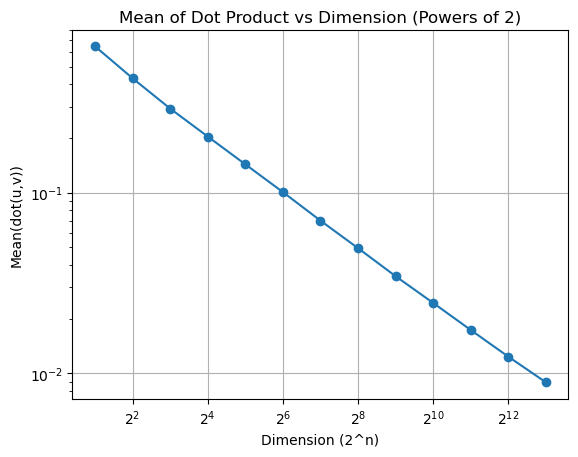

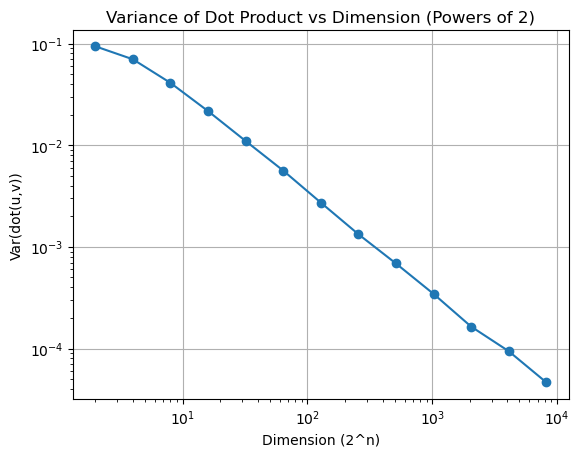

In [3]:

# 绘制 Mean vs Dimension
plt.figure()
plt.plot(dims, means, marker='o')
plt.title('Mean of Dot Product vs Dimension (Powers of 2)')
plt.xlabel('Dimension (2^n)')
plt.ylabel('Mean(dot(u,v))')
plt.xscale('log', base=2)
plt.yscale('log')
plt.grid(True)
plt.show()

# 绘制 Variance vs Dimension
plt.figure()
plt.plot(dims, vars, marker='o')
plt.title('Variance of Dot Product vs Dimension (Powers of 2)')
plt.xlabel('Dimension (2^n)')
plt.ylabel('Var(dot(u,v))')
plt.xscale('log', base=10)
plt.yscale('log')
plt.grid(True)
plt.show()


**Haar度量（Haar measure）**是定义在紧群（如酉群 $U(d)$ ）上的唯一（最多常数因子）左不变与右不变的测度。简单来说，它能让我们从所有 $d$ 维酉矩阵中＂均匀＂地随机抽取一个矩阵，不偏向任何方向或子集。

在实践中，我们可以使用随机高斯矩阵 +QR 分解来近似从 Haar 测度中抽取酉矩阵。步骤如下：

1．生成一个元素为独立标准复高斯分布（实部和虚部均为 $\mathcal{N}(0,1)$ ）的随机矩阵 $X$ ，并乘以 $1 / \sqrt{2}$ 归一化。

2．对 $X$ 做 QR 分解：$X=Q R$ 。

3．通过调整 $R$ 的对角元相位，使得 $Q$ 分布在 Haar 测度下：令

$$
D=\operatorname{diag}\left(e^{-i \arg \left(R_{k k}\right)}\right), \quad U=Q D
$$

# 在酉群上均匀采样

In [4]:
import numpy as np

def random_unitary_Haar(d):
    X = (np.random.randn(d,d) + 1j*np.random.randn(d,d)) / np.sqrt(2)
    Q, R = np.linalg.qr(X)
    # print(Q.conj().T @ Q)
    print(np.diag(R))
    print(np.angle(np.diag(R)))
    D = np.diag(np.exp(-1j*np.angle(np.diag(R))))
    # print(D)
    return Q @ D

# 参数
n = 1
d = 2**n
U = random_unitary_Haar(d)
entries = U.flatten()

print(f"维度 d={d} 的 Haar 随机酉矩阵 U 的条目统计:")
print(f"实部均值: {np.mean(entries.real):.2e}")
print(f"虚部均值: {np.mean(entries.imag):.2e}")
print(f"实部方差: {np.var(entries.real):.2e}")
print(f"虚部方差: {np.var(entries.imag):.2e}")


[ 0.81199143+0.j -0.8879915 +0.j]
[0.         3.14159265]
维度 d=2 的 Haar 随机酉矩阵 U 的条目统计:
实部均值: -3.74e-01
虚部均值: 6.70e-02
实部方差: 3.18e-01
虚部方差: 3.82e-02


In [5]:
import numpy as np
import pandas as pd
from math import sqrt, pi
import matplotlib.pyplot as plt

def random_unitary(d):
    # 生成 Haar 随机酉矩阵
    X = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    Q, R = np.linalg.qr(X)
    D = np.diag(np.exp(-1j * np.angle(np.diag(R))))
    return Q @ D

# 计算不同 n 时平均分量模与理论值
rows = []
for n in range(1, 13):  # n = 3,4,...,10
    d = 2 ** n
    U = random_unitary(d)
    mean_mod = np.mean(np.abs(U)**2)
    theoretical = 1 / d
    rows.append({'n': n, 'dimension': d, 'mean_modulus': mean_mod, 'theoretical': theoretical})

df = pd.DataFrame(rows)

print(df)

     n  dimension  mean_modulus  theoretical
0    1          2      0.500000     0.500000
1    2          4      0.250000     0.250000
2    3          8      0.125000     0.125000
3    4         16      0.062500     0.062500
4    5         32      0.031250     0.031250
5    6         64      0.015625     0.015625
6    7        128      0.007812     0.007812
7    8        256      0.003906     0.003906
8    9        512      0.001953     0.001953
9   10       1024      0.000977     0.000977
10  11       2048      0.000488     0.000488
11  12       4096      0.000244     0.000244


In [6]:
import numpy as np
import pandas as pd

def random_haar_unitary(d):
    # Generate a random matrix with complex Gaussian entries
    z = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    q, r = np.linalg.qr(z)
    # Correct phases to ensure unitary is Haar-distributed
    d_phase = np.diag(r) / np.abs(np.diag(r))
    return q @ np.diag(d_phase)

def estimate_m1(d, index_pairs, num_samples=5000):
    estimates = []
    for (i, j), (i_prime, j_prime) in index_pairs:
        acc = 0+0j
        for _ in range(num_samples):
            U = random_haar_unitary(d)
            acc += U[i, j] * np.conj(U[i_prime, j_prime])
        estimate = acc / num_samples
        estimates.append({
            'i, j': f'({i}, {j})',
            "i', j'": f'({i_prime}, {j_prime})',
            'Estimated E[U_ij U*_i\'j\']': estimate,
            'Expected': (1/d if (i==i_prime and j==j_prime) else 0)
        })
    return pd.DataFrame(estimates)

# Parameters
d = 4
index_pairs = [
    ((0, 1), (0, 1)),  # same indices
    ((0, 1), (1, 0)),  # different indices
    ((2, 2), (2, 2)),  # same indices
    ((2, 2), (3, 3)),  # different indices
]

# Run estimation
df_results = estimate_m1(d, index_pairs, num_samples=5000)

print(df_results)

     i, j  i', j'  Estimated E[U_ij U*_i'j']  Expected
0  (0, 1)  (0, 1)         0.248674+0.000000j      0.25
1  (0, 1)  (1, 0)         0.003743+0.002208j      0.00
2  (2, 2)  (2, 2)         0.247799+0.000000j      0.25
3  (2, 2)  (3, 3)         0.001213-0.000044j      0.00


In [7]:
import numpy as np
import pandas as pd

def random_haar_unitary(d):
    z = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    q, r = np.linalg.qr(z)
    d_phase = np.diag(r) / np.abs(np.diag(r))
    return q @ np.diag(d_phase)

def theoretical_m2(d, idx):
    i1, j1, i2, j2, ip1, jp1, ip2, jp2 = idx
    term1 = (int(i1==ip1) * int(i2==ip2) * int(j1==jp1) * int(j2==jp2) +
             int(i1==ip2) * int(i2==ip1) * int(j1==jp2) * int(j2==jp1))
    term2 = (int(i1==ip1) * int(i2==ip2) * int(j1==jp2) * int(j2==jp1) +
             int(i1==ip2) * int(i2==ip1) * int(j1==jp1) * int(j2==jp2))
    return term1/(d**2-1) - term2/(d*(d**2-1))

def estimate_m2(d, index_tuples, num_samples=3000):
    results = []
    for idx in index_tuples:
        acc = 0+0j
        for _ in range(num_samples):
            U = random_haar_unitary(d)
            i1, j1, i2, j2, ip1, jp1, ip2, jp2 = idx
            acc += U[i1, j1] * U[i2, j2] * np.conj(U[ip1, jp1]) * np.conj(U[ip2, jp2])
        est = acc / num_samples
        results.append({
            'Indices (i1,j1,i2,j2,i1\',j1\',i2\',j2\')': str(idx),
            'Estimated M2': np.round(est, 5),
            'Theoretical M2': np.round(theoretical_m2(d, idx), 5)
        })
    return pd.DataFrame(results)

# Parameters
d = 4
index_tuples = [
    (0, 1, 2, 3, 0, 1, 2, 3),  # same pairs
    (0, 1, 2, 3, 2, 3, 0, 1),  # swapped pairs
    (0, 0, 1, 1, 0, 0, 1, 1),  # same diagonal pairs
    (0, 0, 1, 1, 1, 1, 0, 0),  # swapped diagonal pairs
]

df_m2 = estimate_m2(d, index_tuples, num_samples=3000)
print(df_m2)

  Indices (i1,j1,i2,j2,i1',j1',i2',j2')      Estimated M2  Theoretical M2
0              (0, 1, 2, 3, 0, 1, 2, 3)  0.06379+0.00000j         0.06667
1              (0, 1, 2, 3, 2, 3, 0, 1)  0.06417-0.00000j         0.06667
2              (0, 0, 1, 1, 0, 0, 1, 1)  0.06826+0.00000j         0.06667
3              (0, 0, 1, 1, 1, 1, 0, 0)  0.06422-0.00000j         0.06667


# 验证 Haar 测量的一阶矩 

$\int_{U(d)} U X U^{\dagger} \mathrm{d} \mu_{\operatorname{Tr}ext {Haar }}(U)=\frac{\operatorname{Tr}(X)}{d} I, \quad \forall X$.

In [92]:
import numpy as np

def random_unitary(d):
    """Generate a random unitary matrix distributed according to the Haar measure."""
    Z = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    Q, R = np.linalg.qr(Z)
    D = np.diag(np.exp(-1j * np.angle(np.diag(R))))
    return Q @ D

# Parameters
d = 4
num_samples = 20_000

# Random test matrix X
X = np.random.randn(d, d) + 1j * np.random.randn(d, d)

# Compute the Haar average of U X U^dagger
avg_UXU = np.zeros((d, d), dtype=complex)
for _ in range(num_samples):
    U = random_unitary(d)
    avg_UXU += U @ X @ U.conj().T
avg_UXU /= num_samples

# Theoretical prediction
theory = np.trace(X) / d * np.eye(d)

# Compute difference
diff = np.linalg.norm(avg_UXU - theory)

# print("Sampled average U X U^†:\n", np.round(avg_UXU, 4))
# print("\nTheoretical (Tr(X)/d) I:\n", np.round(theory, 4))
print("\nMax absolute difference:", np.abs(diff))



Max absolute difference: 0.04004941468989144


# 设 f(U) 是一个关于U的一次，二次多项式函数，则在酉群上期望理论值是什么

| 函数 $f(U)$                 | 定义              | 理论期望 $\mathbb{E}_{U\sim{\rm Haar}}[f(U)]$                  |
| :------------------------ | :-------------- | :--------------------------------------------------------- |
| **矩阵值**                   |                 |                                                            |
| $U$                       | —               | $\displaystyle 0$                                          |
| $A\,U$                    | 一次              | $\displaystyle A\,\mathbb{E}[U]=0$                         |
| $U\,B\,U^\dagger$         | 二次              | $\displaystyle \frac{\operatorname{Tr}(B)}{d}\,I$                        |
| $A\,U\,B\,U^\dagger$      | 带前后固定矩阵的二次      | $\displaystyle A\,\frac{\operatorname{Tr}(B)}{d}\,I=\frac{\operatorname{Tr}(B)}{d}\,A$ |
| **标量值（Trace）**            |                 |                                                            |
| $\operatorname{Tr}(U)$                  | $\sum_i U_{ii}$ | $\displaystyle 0$                                          |
| $\operatorname{Tr}(A\,U)$               | 线性              | $\displaystyle 0$                                          |
| $\operatorname{Tr}(U\,B\,U^\dagger)$    | 二次              | $\displaystyle \operatorname{Tr}(B)$                           |
| $\operatorname{Tr}(A\,U\,B\,U^\dagger)$ | 带前固定矩阵的二次       | $\displaystyle \frac{\operatorname{Tr}(A)\,\operatorname{Tr}(B)}{d}$                   |


更一般的结果

* **一阶矩阵元**
  $\displaystyle \mathbb{E}[\,U_{ij}\,]=0$.
* **二阶矩阵元**

  $$
    \mathbb{E}[\,U_{ij}\,U^*_{k\ell}\,]
    =\frac{\delta_{ik}\,\delta_{j\ell}}{d}.
  $$
* **更高阶多项式**
  任意关于 $U$ 与 $U^\dagger$ 的高次多项式的 Haar 平均，可通过 Weingarten 计算（Weingarten calculus）得到组合的 **置换算子** 和 **Weingarten 张量**。例如，

  $$
    \mathbb{E}[\,U_{i_1j_1}\cdots U_{i_m j_m}\,
      U^*_{k_1\ell_1}\cdots U^*_{k_m\ell_m}\,]
    =\sum_{\sigma,\operatorname{Tr}au\in S_m}
      \delta_{i_1 k_{\sigma(1)}}\cdots\delta_{i_m k_{\sigma(m)}}
      \,\delta_{j_1\ell_{\operatorname{Tr}au(1)}}\cdots\delta_{j_m\ell_{\operatorname{Tr}au(m)}}
      \,\mathrm{Wg}(\sigma^{-1}\operatorname{Tr}au;\,d),
  $$

  其中 $\mathrm{Wg}$ 是 Weingarten 函数。


In [112]:
import numpy as np

def random_unitary(d):
    """Generate a Haar-random unitary via QR of normal matrix."""
    Z = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    Q, R = np.linalg.qr(Z)
    D = np.diag(np.exp(-1j * np.angle(np.diag(R))))
    return Q @ D

# 参数
d = 6
num_samples = 30_000

# 随机矩阵 A, B
A = np.random.randn(d, d) + 1j * np.random.randn(d, d)
B = np.random.randn(d, d) + 1j * np.random.randn(d, d)

# 累加
sum_U = np.zeros((d, d), dtype=complex)
sum_AU = np.zeros((d, d), dtype=complex)
sum_UBU = np.zeros((d, d), dtype=complex)
sum_AUBU = np.zeros((d, d), dtype=complex)
sum_tr_U = 0+0j
sum_tr_AU = 0+0j
sum_tr_UBU = 0+0j
sum_tr_AUBU = 0+0j

for _ in range(num_samples):
    U = random_unitary(d)

    sum_U += U
    sum_AU += A @ U
    sum_UBU += U @ B @ U.conj().T
    sum_AUBU += A @ U @ B @ U.conj().T

    sum_tr_U += np.trace(U)
    sum_tr_AU += np.trace(A @ U)
    sum_tr_UBU += np.trace(U @ B @ U.conj().T)
    sum_tr_AUBU += np.trace(A @ U @ B @ U.conj().T)

# 计算平均
avg_U = sum_U / num_samples
avg_AU = sum_AU / num_samples
avg_UBU = sum_UBU / num_samples
avg_AUBU = sum_AUBU / num_samples
avg_tr_U = sum_tr_U / num_samples
avg_tr_AU = sum_tr_AU / num_samples
avg_tr_UBU = sum_tr_UBU / num_samples
avg_tr_AUBU = sum_tr_AUBU / num_samples

# 理论值
theory_U = np.zeros((d, d), dtype=complex)
theory_AU = np.zeros((d, d), dtype=complex)
theory_UBU = (np.trace(B) / d) * np.eye(d)
theory_AUBU = (np.trace(B) / d) * A

theory_tr_U = 0
theory_tr_AU = 0
theory_tr_UBU = np.trace(B)
theory_tr_AUBU = (np.trace(A) * np.trace(B)) / d

# 打印结果
print("=== Matrix-valued expectations ===")
print("Error ||E[U] - Theory|| =", np.linalg.norm(avg_U - theory_U))
print("Error ||E[A U] - Theory|| =", np.linalg.norm(avg_AU - theory_AU))
print("Error ||E[UBU] - Theory|| =", np.linalg.norm(avg_UBU - theory_UBU))
print("Error ||E[AUBU] - Theory|| =", np.linalg.norm(avg_AUBU - theory_AUBU))

print("=== Scalar (trace) expectations ===")
print("Error =", abs(avg_tr_U - theory_tr_U))
print("Error =", abs(avg_tr_AU - theory_tr_AU))
print("Error =", abs(avg_tr_UBU - theory_tr_UBU))
print("Error =", abs(avg_tr_AUBU - theory_tr_AUBU))


=== Matrix-valued expectations ===
Error ||E[U] - Theory|| = 0.016024587298623903
Error ||E[A U] - Theory|| = 0.0705242709096278
Error ||E[UBU] - Theory|| = 0.04201450032981475
Error ||E[AUBU] - Theory|| = 0.16169751280477765
=== Scalar (trace) expectations ===
Error = 0.008537346415356705
Error = 0.020703823272446676
Error = 1.1071167023329623e-12
Error = 0.1171096960603854


# 目标函数的黎曼梯度在

In [144]:
import numpy as np

def random_unitary(d):
    """Generate a Haar-random unitary via QR of normal matrix."""
    Z = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    Q, R = np.linalg.qr(Z)
    D = np.diag(np.exp(-1j * np.angle(np.diag(R))))
    return Q @ D

# 参数
n = 5
d = 2**n
num_samples = 30_000

# 随机矩阵 A, B
A = np.random.randn(d, d) + 1j * np.random.randn(d, d)
H = A + np.conj(A.T)

psi = np.random.randn(d, 1) + 1j * np.random.randn(d, 1)
psi = psi / np.linalg.norm(psi)
rho = np.outer(psi, np.conj(psi))

# 累加与误差统计
sum_g_1 = np.zeros((d, d), dtype=complex)
sum_g_2 = np.zeros((d, d), dtype=complex)
norms1 = np.zeros(num_samples)
norms2 = np.zeros(num_samples)

for i in range(num_samples):
    U = random_unitary(d)
    UBU = U @ rho @ U.conj().T
    UHU = U.conj().T @ H @ U

    g1 = (H @ UBU - UBU @ H) @ U
    g2 = U @ (UHU @ rho - rho @ UHU)

    sum_g_1 += g1
    sum_g_2 += g2

    norms1[i] = np.linalg.norm(g1, 'fro')
    norms2[i] = np.linalg.norm(g2, 'fro')

# 计算平均和标准误差
avg_g_1 = sum_g_1 / num_samples
avg_g_2 = sum_g_2 / num_samples

mean_norm1 = np.mean(norms1)
se_norm1 = np.var(norms1, ddof=1) #/ np.sqrt(num_samples)
mean_norm2 = np.mean(norms2)
se_norm2 = np.var(norms2, ddof=1) #/ np.sqrt(num_samples)

print("Average matrix norm ||E[g1]|| =", np.linalg.norm(avg_g_1))
print(f"Mean norm of g1 samples = {mean_norm1:.4e}, var = {se_norm1:.4e}")

print("Average matrix norm ||E[g2]|| =", np.linalg.norm(avg_g_2))
print(f"Mean norm of g2 samples = {mean_norm2:.4e}, var = {se_norm2:.4e}")


Average matrix norm ||E[g1]|| = 0.08375959570478436
Mean norm of g1 samples = 1.4918e+01, var = 1.6680e+00
Average matrix norm ||E[g2]|| = 0.08375959570478438
Mean norm of g2 samples = 1.4918e+01, var = 1.6680e+00


In [130]:
import numpy as np

def random_unitary(d):
    """Generate a Haar-random unitary via QR of normal matrix."""
    Z = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    Q, R = np.linalg.qr(Z)
    D = np.diag(np.exp(-1j * np.angle(np.diag(R))))
    return Q @ D

# 参数
d = 6
num_samples = 300_000

# 随机矩阵 A, B
A = np.random.randn(d, d) + 1j * np.random.randn(d, d)
H = A + np.conj(A.T)

psi = np.random.randn(d, 1) + 1j * np.random.randn(d, 1)
psi = psi / np.linalg.norm(psi)
rho = np.outer(psi, np.conj(psi))


# 累加
sum_g_1 = np.zeros((d, d), dtype=complex)
sum_g_2 = np.zeros((d, d), dtype=complex)
sum_g = np.zeros((d, d), dtype=complex)

for _ in range(num_samples):
    U = random_unitary(d)

    sum_g_1 += H @ U @ rho
    sum_g_2 += U @ rho @ U.conj().T @ H @ U

    # sum_g_1 += H @ UBU - UBU @ H
    # sum_g_2 += UHU @ rho - rho @ UHU
    
# 计算平均
avg_g_1 = sum_g_1 / num_samples
avg_g_2 = sum_g_2 / num_samples


print("Error ||E[U] - Theory|| =", np.linalg.norm(avg_g_1))
print("Error ||E[A U] - Theory|| =", np.linalg.norm(avg_g_2))



Error ||E[U] - Theory|| = 0.00776480578116545
Error ||E[A U] - Theory|| = 0.009907393211703724


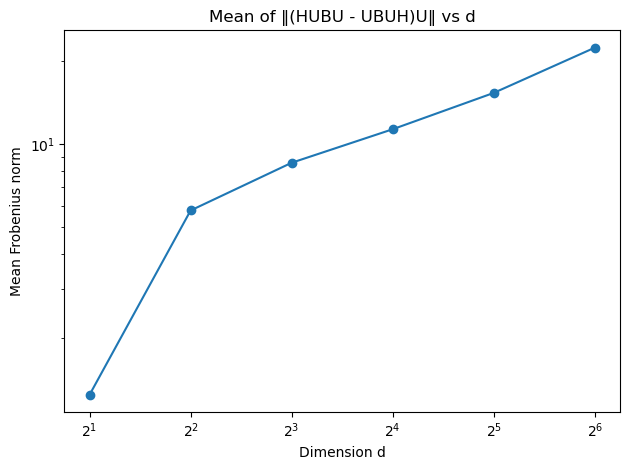

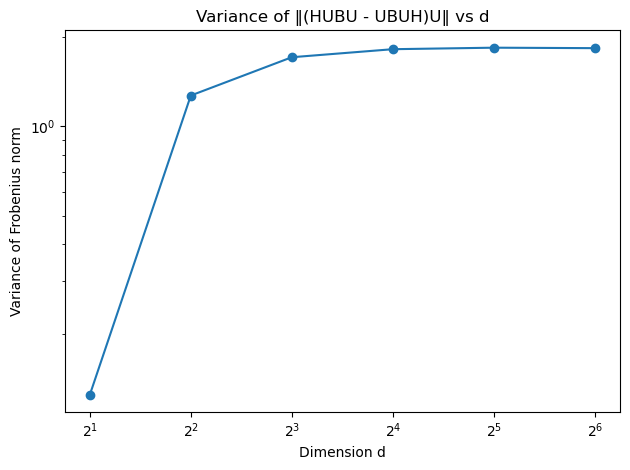

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random_unitary(d):
    """Generate a Haar-random unitary via QR of normal matrix."""
    Z = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    Q, R = np.linalg.qr(Z)
    D = np.diag(np.exp(-1j * np.angle(np.diag(R))))
    return Q @ D

# Parameters
ns = range(1, 7)
ds = [2**n for n in ns]
num_samples = 30_000  # Reduced for computational feasibility

mean_norms = []
var_norms = []

for d in ds:
    # Random Hermitian H and random pure state rho
    A = np.random.randn(d, d) + 1j * np.random.randn(d, d)
    H = A + A.conj().T
    psi = np.random.randn(d) + 1j * np.random.randn(d)
    psi /= np.linalg.norm(psi)
    rho = np.outer(psi, psi.conj())

    sum_g = np.zeros((d, d), dtype=complex)

    norms = []
    for _ in range(num_samples):
        U = random_unitary(d)
        UBU = U @ rho @ U.conj().T
        g1 = (H @ UBU - UBU @ H)  @ U
        sum_g += g1
        # norms.append(np.linalg.norm(g1, 'fro'))
    
    norms = np.array(norms)
    mean_norms.append(norms.mean())
    var_norms.append(norms.var())

# Plotting mean norm vs d
plt.figure()
plt.plot(ds, mean_norms, marker='o')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('Dimension d')
plt.ylabel('Mean Frobenius norm')
plt.title('Mean of ‖(HUBU - UBUH)U‖ vs d')
plt.tight_layout()
plt.show()

# Plotting variance vs d
plt.figure()
plt.plot(ds, var_norms, marker='o')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('Dimension d')
plt.ylabel('Variance of Frobenius norm')
plt.title('Variance of ‖(HUBU - UBUH)U‖ vs d')
plt.tight_layout()
plt.show()


下述结果展示了对函数

$$
f(U)=\left[H, U \rho U^{\dagger}\right] U
$$


在 Haar 分布下的 Monte Carlo 估计：

1．矩阵期望 $E[f(U)]$ ：输出的 $d \times d$ 复矩阵，理论上应为零矩阵。

2．元素方差 $\operatorname{Var}[f(U)]$ ：逐元素计算 $E\left[\left|f_{i j}\right|^2\right]-\left|E\left[f_{i j}\right]\right|^2$ ，展示了每个条目上的波动大小。

3．Frobenius 范数的均值与方差：对 $\|f(U)\|_F$ 的分布给出了均值和方差，量化了整体规模和不确定性。

你可以根据需要调节 num＿samples（样本数）或维度 $d$ ，以获得更精确或不同维度下的统计结果。

In [155]:
import numpy as np

def random_unitary(d):
    """Generate a Haar-random unitary via QR of complex normal matrix."""
    Z = (np.random.randn(d, d) + 1j * np.random.randn(d, d)) / np.sqrt(2)
    Q, R = np.linalg.qr(Z)
    D = np.diag(np.exp(-1j * np.angle(np.diag(R))))
    return Q @ D

# Parameters
n = 6
d = 2**n
num_samples = 20000  # 调整样本数以平衡精度和速度

# 随机 Hermitian H 和纯态 rho
A = np.random.randn(d, d) + 1j * np.random.randn(d, d)
H = A + A.conj().T
H = np.zeros((d, d))
H[0,0] = 1
psi = np.random.randn(d) + 1j * np.random.randn(d)
psi /= np.linalg.norm(psi)
rho = np.outer(psi, psi.conj())

# 累加
sum_f = np.zeros((d, d), dtype=complex)
sum_f2 = np.zeros((d, d), dtype=float)  # 累加 |f_ij|^2

for _ in range(num_samples):
    U = random_unitary(d)
    comm = H @ (U @ rho @ U.conj().T) - (U @ rho @ U.conj().T) @ H
    f = comm @ U
    sum_f += f
    sum_f2 += np.abs(f)**2

# 计算样本均值和元素方差
mean_f = sum_f / num_samples
var_f = sum_f2 / num_samples - np.abs(mean_f)**2

# 计算均方误差 MSE = E[||f - E[f]||_F^2] = sum_{i,j} Var(f_ij)
mse = np.sum(var_f)

# 输出
# print("Elementwise variance Var[f_ij]:\n", np.round(var_f, 4))
print(f"\nMean Squared Error (MSE) = sum Var[f_ij] = {mse:.4e}")



Mean Squared Error (MSE) = sum Var[f_ij] = 3.0322e-02
